In [160]:
# Bibliotecas
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from typing import List

In [161]:
# Variáveis de Ambiente

# Arquivo Principal
diretorio = os.path.join(os.getcwd(), 'base')
caminho_dados = os.path.join(diretorio, 'br_sp_gov_ssp_ocorrencias_registradas.csv')
dados = pd.read_csv(caminho_dados)

### Análise Exploratória

In [162]:
# Ano Mínimo e Máximo
print(dados['ano'].min(), dados['ano'].max())

2002 2021


In [163]:
# Exibe a quantidade de registros e colunas da base
dados.shape

(153876, 27)

In [164]:
# Exibe a lista de colunas da base
dados.columns

Index(['ano', 'mes', 'id_municipio', 'regiao_ssp', 'homicidio_doloso',
       'numero_de_vitimas_em_homicidio_doloso',
       'homicidio_doloso_por_acidente_de_transito',
       'numero_de_vitimas_em_homicidio_doloso_por_acidente_de_transito',
       'homicidio_culposo_por_acidente_de_transito',
       'homicidio_culposo_outros', 'tentativa_de_homicidio',
       'lesao_corporal_seguida_de_morte', 'lesao_corporal_dolosa',
       'lesao_corporal_culposa_por_acidente_de_transito',
       'lesao_corporal_culposa_outras', 'latrocinio',
       'numero_de_vitimas_em_latrocinio', 'total_de_estupro', 'estupro',
       'estupro_de_vulneravel', 'total_de_roubo_outros', 'roubo_outros',
       'roubo_de_veiculo', 'roubo_a_banco', 'roubo_de_carga', 'furto_outros',
       'furto_de_veiculo'],
      dtype='object')

In [165]:
# Exibe a quantidade de valores nulos em cada coluna
dados.isnull().sum()

ano                                                                    0
mes                                                                    0
id_municipio                                                           0
regiao_ssp                                                             0
homicidio_doloso                                                    2580
numero_de_vitimas_em_homicidio_doloso                               2580
homicidio_doloso_por_acidente_de_transito                          10176
numero_de_vitimas_em_homicidio_doloso_por_acidente_de_transito     10176
homicidio_culposo_por_acidente_de_transito                          2580
homicidio_culposo_outros                                            2580
tentativa_de_homicidio                                              2580
lesao_corporal_seguida_de_morte                                    48648
lesao_corporal_dolosa                                               2580
lesao_corporal_culposa_por_acidente_de_transito    

In [166]:
# Exibe informações gerais sobre a base
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153876 entries, 0 to 153875
Data columns (total 27 columns):
 #   Column                                                          Non-Null Count   Dtype  
---  ------                                                          --------------   -----  
 0   ano                                                             153876 non-null  int64  
 1   mes                                                             153876 non-null  int64  
 2   id_municipio                                                    153876 non-null  int64  
 3   regiao_ssp                                                      153876 non-null  object 
 4   homicidio_doloso                                                151296 non-null  float64
 5   numero_de_vitimas_em_homicidio_doloso                           151296 non-null  float64
 6   homicidio_doloso_por_acidente_de_transito                       143700 non-null  float64
 7   numero_de_vitimas_em_homicidio_doloso_

In [167]:
# Exibe os cinco primeiros registros da base
dados.head()

,ano,mes,id_municipio,regiao_ssp,homicidio_doloso,numero_de_vitimas_em_homicidio_doloso,homicidio_doloso_por_acidente_de_transito,numero_de_vitimas_em_homicidio_doloso_por_acidente_de_transito,homicidio_culposo_por_acidente_de_transito,homicidio_culposo_outros,...,total_de_estupro,estupro,estupro_de_vulneravel,total_de_roubo_outros,roubo_outros,roubo_de_veiculo,roubo_a_banco,roubo_de_carga,furto_outros,furto_de_veiculo
0,2002,1,3500105,Presidente Prudente,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,21.0,0.0
1,2002,2,3500105,Presidente Prudente,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,32.0,0.0
2,2002,3,3500105,Presidente Prudente,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,36.0,0.0
3,2002,4,3500105,Presidente Prudente,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,1.0,NaN,0.0,0.0,0.0,45.0,0.0
4,2002,5,3500105,Presidente Prudente,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,1.0,NaN,0.0,0.0,0.0,35.0,0.0


In [168]:
# Exibe os cinco últimos registros da base
dados.tail()

,ano,mes,id_municipio,regiao_ssp,homicidio_doloso,numero_de_vitimas_em_homicidio_doloso,homicidio_doloso_por_acidente_de_transito,numero_de_vitimas_em_homicidio_doloso_por_acidente_de_transito,homicidio_culposo_por_acidente_de_transito,homicidio_culposo_outros,...,total_de_estupro,estupro,estupro_de_vulneravel,total_de_roubo_outros,roubo_outros,roubo_de_veiculo,roubo_a_banco,roubo_de_carga,furto_outros,furto_de_veiculo
153871,2019,8,3500105,Presidente Prudente,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0
153872,2019,9,3500105,Presidente Prudente,1.0,1.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0
153873,2019,10,3500105,Presidente Prudente,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,13.0,1.0
153874,2019,11,3500105,Presidente Prudente,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,14.0,1.0
153875,2019,12,3500105,Presidente Prudente,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,14.0,0.0


In [169]:
# Exibe o resumo estatístico dos dados
dados.describe()

,ano,mes,id_municipio,homicidio_doloso,numero_de_vitimas_em_homicidio_doloso,homicidio_doloso_por_acidente_de_transito,numero_de_vitimas_em_homicidio_doloso_por_acidente_de_transito,homicidio_culposo_por_acidente_de_transito,homicidio_culposo_outros,tentativa_de_homicidio,...,total_de_estupro,estupro,estupro_de_vulneravel,total_de_roubo_outros,roubo_outros,roubo_de_veiculo,roubo_a_banco,roubo_de_carga,furto_outros,furto_de_veiculo
count,153876.000000,153876.000000,1.538760e+05,151296.000000,151296.000000,143700.000000,143700.000000,151296.000000,151296.000000,151296.000000,...,151296.000000,35988.000000,43680.000000,151296.000000,35988.000000,151296.000000,151296.000000,151296.000000,151296.000000,151296.000000
mean,2011.503158,6.500000,3.528670e+06,0.671558,0.711526,0.003292,0.004036,0.541878,0.032089,0.745281,...,1.057397,0.396688,0.966003,32.460039,31.959264,9.314311,0.025176,0.924089,66.754019,13.507456
std,5.771254,3.452064,1.673251e+04,6.784264,7.214758,0.069767,0.091217,2.363979,0.322086,5.398951,...,7.299465,2.693445,5.725064,427.796418,444.889097,126.973193,0.487330,14.084669,598.922563,153.603132
min,2002.000000,1.000000,3.500105e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,3.750000,3.514502e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,2012.000000,6.500000,3.528502e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000
75%,2017.000000,9.250000,3.543238e+06,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,4.000000,3.000000,1.000000,0.000000,0.000000,35.000000,2.000000
max,2021.000000,12.000000,3.557303e+06,474.000000,499.000000,8.000000,11.000000,91.000000,33.000000,288.000000,...,329.000000,103.000000,218.000000,14927.000000,14337.000000,5082.000000,34.000000,655.000000,25063.000000,5296.000000


### Distribuição de Frequências & Gráficos 

Ano   Frequência  Porcentual (%)
2021        7740        5.030024
2005        7728        5.022226
2018        7728        5.022226
2002        7716        5.014427
2008        7704        5.006629
2020        7704        5.006629
2004        7704        5.006629
2014        7704        5.006629
2019        7704        5.006629
2006        7692        4.998830
2011        7692        4.998830
2017        7692        4.998830
2016        7692        4.998830
2003        7680        4.991032
2010        7680        4.991032
2007        7668        4.983233
2012        7668        4.983233
2015        7668        4.983233
2013        7656        4.975435
2009        7656        4.975435


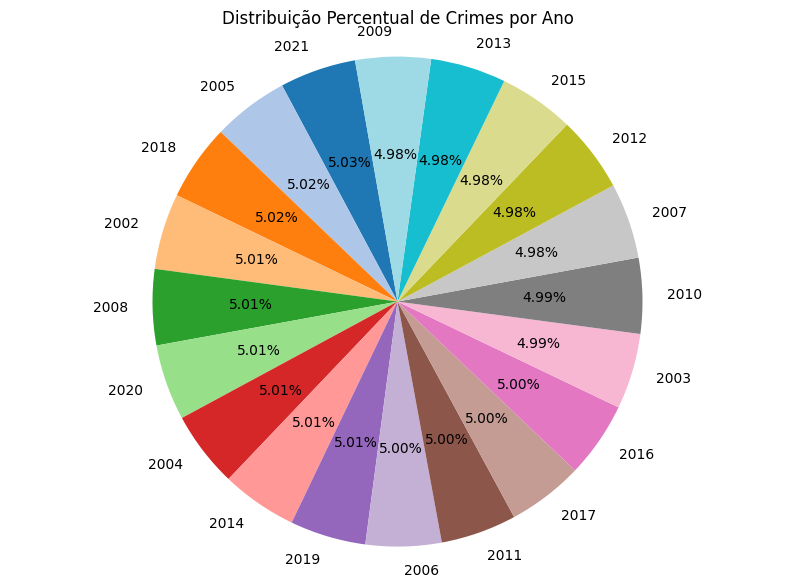

In [170]:
# Distribuição da frequência de ocorrências na coluna "Ano"
frequencia_ano = dados['ano'].value_counts()
porcentual_ano = dados['ano'].value_counts(normalize=True) * 100
dist_freq_ano = pd.DataFrame({'Frequência': frequencia_ano, 'Porcentual (%)': porcentual_ano})
dist_freq_ano.rename_axis('Ano', axis = 'columns', inplace=True)
print(dist_freq_ano)

# Gerar uma lista de cores a partir de uma paleta com mais opções
cmap = plt.get_cmap('tab20') 
colors = cmap(np.linspace(0, 1, len(dist_freq_ano)))

# Gráfico Pizza
plt.figure(figsize=(10, 7))
plt.pie(dist_freq_ano['Porcentual (%)'], labels=dist_freq_ano.index, autopct='%1.2f%%', startangle=100, colors=colors)
plt.title('Distribuição Percentual de Crimes por Ano')
plt.axis('equal')
plt.show()

Região                               Frequência  Porcentual (%)
São José do Rio Preto                     22548       14.653357
Ribeirão Preto                            22284       14.481791
Sorocaba                                  18720       12.165640
Bauru                                     18168       11.806909
Presidente Prudente                       15936       10.356391
Piracicaba                                12456        8.094830
Araçatuba                                 10272        6.675505
São José dos Campos                        9312        6.051626
Grande São Paulo (exclui a Capital)        9120        5.926850
Campinas                                   9060        5.887858
Santos                                     5760        3.743274
Capital                                     240        0.155970


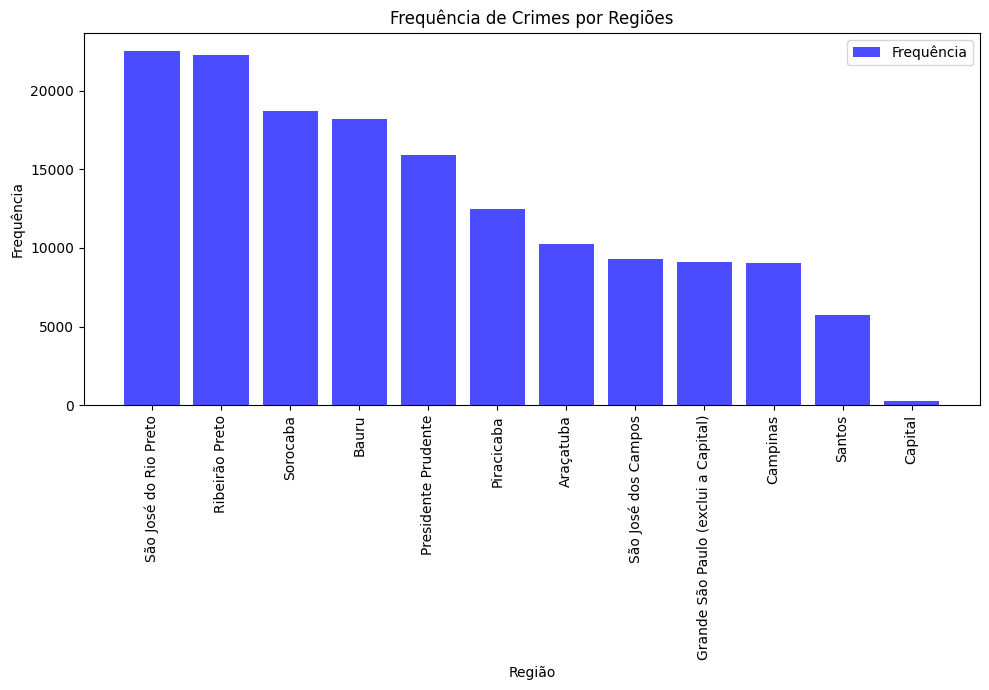

In [171]:
# Distribuição da frequência de ocorrências na coluna "Região"
frequencia_regiao = dados['regiao_ssp'].value_counts()
porcentual_regiao = dados['regiao_ssp'].value_counts(normalize=True) * 100
dist_freq_regiao = pd.DataFrame({'Frequência': frequencia_regiao, 'Porcentual (%)': porcentual_regiao})
dist_freq_regiao.rename_axis('Região', axis = 'columns', inplace=True)
print(dist_freq_regiao)

# Gráfico de Barra
plt.figure(figsize=(10, 7))
plt.bar(dist_freq_regiao.index, dist_freq_regiao['Frequência'], color='blue', alpha=0.7, label='Frequência')
plt.xlabel('Região')
plt.ylabel('Frequência')
plt.title('Frequência de Crimes por Regiões')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

In [172]:
# Cruzamento de dados entre as variáveis "Ano" e "regiao_ssp"
crimes_regiao_por_ano = pd.crosstab(dados['regiao_ssp'], 
                                    dados['ano'],
                                    margins=True)
crimes_regiao_por_ano

ano,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,All
regiao_ssp,,,,,,,,,,,,,,,,,,,,,
Araçatuba,516,516,516,516,516,504,516,504,516,516,...,516,516,516,516,516,516,504,516,516,10272
Bauru,912,912,912,912,912,912,912,912,912,912,...,900,912,900,888,900,912,900,912,912,18168
Campinas,456,444,444,456,456,456,456,456,444,456,...,456,456,444,444,456,456,456,456,456,9060
Capital,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,240
Grande São Paulo (exclui a Capital),456,456,456,456,456,456,456,456,456,456,...,456,456,456,456,456,456,456,456,456,9120
Piracicaba,624,624,624,624,624,624,624,624,624,624,...,624,624,624,624,624,624,624,612,624,12456
Presidente Prudente,792,780,780,804,780,792,804,792,804,804,...,804,792,792,804,804,804,804,792,804,15936
Ribeirão Preto,1116,1116,1116,1116,1116,1104,1116,1116,1116,1116,...,1116,1104,1116,1116,1104,1116,1116,1116,1116,22284
Santos,288,288,288,288,288,288,288,288,288,288,...,288,288,288,288,288,288,288,288,288,5760


In [173]:
# Cruzamento de dados entre as variáveis "Ano" e "regiao_ssp", calculando a média de furtos de veículos por região e ano, incluindo os totais gerais
media_crimes_regiao_por_ano__furto_de_veiculo = pd.crosstab(dados['regiao_ssp'], 
                                                    dados['ano'],
                                                    aggfunc='mean',
                                                    values=dados['furto_de_veiculo'],
                                                    margins=True)  
media_crimes_regiao_por_ano__furto_de_veiculo


ano,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,All
regiao_ssp,,,,,,,,,,,,,,,,,,,,,
Araçatuba,1.193798,1.079457,0.959302,1.172481,0.767442,0.962302,0.887597,1.396825,1.257752,1.313953,...,1.251938,1.313953,1.505814,1.098837,1.013566,0.924419,0.867063,0.810078,0.659884,1.086040
Bauru,1.380482,1.129386,1.302632,1.301535,1.196272,1.013158,1.046053,1.497807,1.457237,1.764254,...,2.326667,2.787281,2.253333,2.656532,2.100000,1.845395,1.534444,1.152412,1.167763,1.656852
Campinas,19.614035,21.894144,24.304054,22.703947,21.706140,21.094298,23.127193,24.063596,21.184685,22.732456,...,20.833333,21.462719,19.522523,18.885135,17.298246,17.070175,16.368421,11.901316,12.184211,20.088011
Capital,4388.500000,4250.166667,4700.666667,4801.250000,4402.083333,3677.750000,3588.000000,3593.166667,3577.500000,3564.833333,...,4039.750000,4141.916667,3649.666667,3722.333333,3545.583333,3366.250000,3110.916667,2252.916667,2781.250000,3752.771186
Grande São Paulo (exclui a Capital),46.804825,44.903509,43.087719,47.339912,45.019737,38.532895,38.521930,42.541667,39.730263,40.313596,...,49.265351,57.353070,50.063596,51.035088,49.940789,50.831140,47.583333,34.567982,42.138158,45.340879
Piracicaba,8.892628,8.801282,10.153846,10.921474,10.772436,11.471154,11.472756,12.222756,11.634615,14.302885,...,14.866987,14.653846,13.524038,13.373397,12.458333,10.990385,9.733974,7.022876,6.709135,11.479099
Presidente Prudente,0.492424,0.358974,0.497436,0.590796,0.611538,0.570707,0.575871,0.681818,0.707711,0.687811,...,0.838308,0.827020,0.818182,1.043532,1.032338,0.752488,0.497512,0.398990,0.423507,0.663773
Ribeirão Preto,2.600358,3.086022,3.920251,3.793907,4.192652,3.668478,3.827061,5.155018,4.933692,6.030466,...,6.702509,6.903080,6.139785,6.107527,4.849638,4.393369,4.092294,3.105735,3.685484,4.683552
Santos,13.989583,17.600694,15.538194,16.138889,16.718750,17.666667,16.201389,17.309028,17.218750,16.538194,...,13.677083,16.225694,16.135417,13.565972,13.711806,11.562500,10.083333,7.548611,8.890625,14.671610


In [174]:
# Cruzamento de dados entre as variáveis "Ano" e "regiao_ssp", calculando a média de furtos outros por região e ano, incluindo os totais gerais
media_crimes_regiao_por_ano__furto_outros = pd.crosstab(dados['regiao_ssp'], 
                                                    dados['ano'],
                                                    aggfunc='mean',
                                                    values=dados['furto_outros'],
                                                    margins=True)  

media_crimes_regiao_por_ano__furto_outros

ano,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,All
regiao_ssp,,,,,,,,,,,,,,,,,,,,,
Araçatuba,24.230620,29.257752,28.290698,27.389535,26.501938,26.303571,22.040698,22.529762,19.397287,17.302326,...,16.875969,16.265504,16.116279,16.843023,16.699612,15.319767,14.853175,12.370155,14.267442,20.072574
Bauru,28.781798,30.801535,31.021930,30.044956,26.141447,24.082237,23.173246,25.396930,22.428728,23.217105,...,23.737778,21.140351,21.265556,23.880631,24.098889,21.285088,20.607778,15.687500,17.899671,24.014666
Campinas,84.914474,104.076577,109.299550,102.092105,98.885965,102.567982,90.581140,93.096491,93.502252,98.559211,...,90.320175,95.436404,93.002252,95.740991,89.589912,86.383772,81.344298,59.390351,69.980263,92.075887
Capital,10533.416667,11840.500000,13836.750000,14676.583333,14347.333333,12272.583333,12780.750000,14631.750000,14181.750000,16521.000000,...,16775.416667,15893.083333,14766.583333,15279.166667,16140.500000,16816.500000,18880.500000,13703.666667,14225.875000,14744.783898
Grande São Paulo (exclui a Capital),137.451754,160.223684,145.451754,141.714912,146.013158,153.807018,149.732456,146.109649,139.673246,142.921053,...,162.127193,149.140351,145.085526,150.234649,145.410088,140.971491,150.899123,119.302632,141.743421,146.333519
Piracicaba,54.604167,62.828526,61.589744,58.918269,59.641026,58.094551,50.235577,55.634615,52.076923,54.094551,...,51.459936,49.649038,48.405449,51.413462,50.028846,46.370192,43.142628,32.357843,37.677885,51.809520
Presidente Prudente,16.061869,15.676923,16.614103,18.939055,16.130769,14.397727,15.235075,15.116162,14.648010,14.186567,...,12.998756,11.590909,12.279040,13.085821,12.839552,11.485075,10.686567,7.661616,9.138060,13.692750
Ribeirão Preto,40.783154,50.181004,51.081541,53.979391,51.607527,50.389493,41.541219,45.397849,43.336918,42.410394,...,43.303763,42.926630,41.109319,43.181004,39.402174,37.442652,34.378136,25.157706,29.217742,42.711893
Santos,100.434028,122.017361,123.743056,115.920139,119.638889,118.784722,95.347222,104.454861,105.444444,115.409722,...,117.899306,108.312500,100.250000,98.142361,96.982639,91.937500,100.475694,88.416667,98.401042,107.304732


### Categorização de variável quantitativa

In [94]:
def calcular_numero_classes(df: pd.DataFrame) -> int:
    """
    Calcula o número ideal de classes para um histograma usando a regra de Sturges,
    baseado no número de observações de um DataFrame.
    
    A fórmula utilizada é:
    k = 1 + (10 / 3) * log10(n)
    onde k é o número de classes e n é o número de observações (número de linhas do DataFrame).
    
    Parâmetros:
    ----------
    df : pd.DataFrame
        DataFrame cujas linhas representam as observações.
    
    Retorna:
    --------
    int
        O número ideal de classes arredondado para o valor inteiro mais próximo.
    """
    n = df.shape[0]  # número de observações
    k = 1 + (10 / 3) * np.log10(n)
    return int(k.round())


def criar_faixas_quantis(df: pd.DataFrame, coluna: str, num_classes: int) -> pd.DataFrame:
    """
    Cria faixas de quantis para uma coluna específica de um DataFrame usando o número de classes fornecido.
    
    Utiliza a função pd.qcut para dividir a coluna em faixas baseadas nos quantis.
    
    Parâmetros:
    ----------
    df : pd.DataFrame
        O DataFrame que contém a coluna a ser dividida em faixas.
    coluna : str
        O nome da coluna que será utilizada para criar as faixas.
    num_classes : int
        O número de classes (quantis) que a coluna será dividida.
    
    Retorna:
    --------
    pd.DataFrame
        O DataFrame original com uma nova coluna 'intervalo_categorização', 
        que contém as faixas geradas.
    """
    df['intervalo_categorização'] = pd.qcut(df[coluna], q=num_classes)
    return df


def definir_classes_pelos_limites(df: pd.DataFrame) -> List[float]:
    """
    Define classes através dos limites inferiores de uma coluna categorizada (gerada por pd.qcut) 
    e adiciona um limite superior infinito para capturar todos os valores.

    Parâmetros:
    ----------
    df : pd.DataFrame
        O DataFrame que contém a coluna categorizada.
    coluna_faixa : str
        O nome da coluna categorizada (geralmente criada com pd.qcut) que contém os intervalos.

    Retorna:
    --------
    List[float]
        Uma lista contendo os limites inferiores das classes, com o limite superior como infinito.
    """
    intervalo_categorizacao = []
    
    for categoria in df['intervalo_categorização'].unique():
        intervalo_categorizacao.append(categoria.left)

    intervalo_categorizacao.append(float('inf'))
    classes = sorted(intervalo_categorizacao)
    
    return classes


def categorizar_por_classes(df: pd.DataFrame, coluna: str, classes: List[float], labels: List[str], nova_coluna: str = 'categoria') -> pd.DataFrame:
    """
    Categoriza uma coluna de um DataFrame com base nos intervalos fornecidos (classes) e rótulos.

    Utiliza a função pd.cut para dividir os valores da coluna em categorias.

    Parâmetros:
    ----------
    df : pd.DataFrame
        O DataFrame que contém a coluna a ser categorizada.
    coluna : str
        O nome da coluna que será categorizada.
    classes : List[float]
        Lista de limites (bins) que definem os intervalos para categorização.
    labels : List[str]
        Lista de rótulos correspondentes às categorias.
    nova_coluna : str, opcional
        O nome da nova coluna onde serão armazenadas as categorias (padrão é 'categoria').

    Retorna:
    --------
    pd.DataFrame
        O DataFrame original com uma nova coluna contendo as categorias atribuídas.
    """
    df[nova_coluna] = pd.cut(
        x=df[coluna],
        bins=classes,
        labels=labels,
        include_lowest=True
    )
    return df

In [101]:
# Agrupa os dados por ano e soma 'total_de_roubo_outros'
roubos_outros_agrupados_por_ano = dados.groupby('ano', as_index=False)['total_de_roubo_outros'].sum()

# Calcula o número de classes com base na regra de Sturges
num_classes = calcular_numero_classes(roubos_outros_agrupados_por_ano)

# Cria faixas de quantis baseadas em 'total_de_roubo_outros' e num_classes
roubos_outros_agrupados_por_ano = criar_faixas_quantis(roubos_outros_agrupados_por_ano, 
                                                    'total_de_roubo_outros', 
                                                    num_classes)

# Define os limites inferiores das classes
classes = definir_classes_pelos_limites(roubos_outros_agrupados_por_ano)

# Rótulos para as classes
labels = ['Nível 1', 'Nível 2', 'Nível 3', 'Nível 4', 'Nível 5']

# Categoriza 'total_de_roubo_outros' nas classes definidas
roubos_outros_agrupados_por_ano = categorizar_por_classes(
    df=roubos_outros_agrupados_por_ano, 
    coluna='total_de_roubo_outros', 
    classes=classes, 
    labels=labels
)

# Exibe as primeiras linhas do DataFrame atualizado
roubos_outros_agrupados_por_ano = roubos_outros_agrupados_por_ano.drop(columns=['intervalo_categorização'])
roubos_outros_agrupados_por_ano



Valor Mínimo: 147214.0, 
Valor Máximo: 323226.0


,ano,total_de_roubo_outros,categoria
0,2002,223579.0,Nível 2
1,2003,248289.0,Nível 3
2,2004,220172.0,Nível 2
3,2005,221816.0,Nível 2
4,2006,213394.0,Nível 1
5,2007,217108.0,Nível 1
6,2008,217952.0,Nível 1
7,2009,256958.0,Nível 4
8,2010,232854.0,Nível 3
9,2011,235512.0,Nível 3


In [186]:
# Agrupa os dados por ano e soma os valores de 'furto_de_veiculo'
furto_de_veiculo_por_ano = dados.groupby('ano', as_index=False)['furto_de_veiculo'].sum()

# Calcula o número de classes com base na regra de Sturges
num_classes = calcular_numero_classes(furto_de_veiculo_por_ano)

# Cria faixas de quantis para 'furto_de_veiculo' usando o número de classes
furto_de_veiculo_por_ano = criar_faixas_quantis(furto_de_veiculo_por_ano, 
                                                'furto_de_veiculo', 
                                                num_classes)

# Define os limites das classes
classes = definir_classes_pelos_limites(furto_de_veiculo_por_ano)

# Rótulos para as classes
labels = ['Nível 1', 'Nível 2', 'Nível 3', 'Nível 4', 'Nível 5']

# Categoriza 'furto_de_veiculo' nas classes definidas
furto_de_veiculo_por_ano = categorizar_por_classes(
    df=furto_de_veiculo_por_ano, 
    coluna='furto_de_veiculo', 
    classes=classes, 
    labels=labels
)

# Remove a coluna 'intervalo_categorização' do DataFrame
furto_de_veiculo_por_ano = furto_de_veiculo_por_ano.drop(columns=['intervalo_categorização'])

# Exibe o DataFrame atualizado
furto_de_veiculo_por_ano

,ano,furto_de_veiculo,categoria
0,2002,106814.0,Nível 3
1,2003,106256.0,Nível 3
2,2004,113673.0,Nível 5
3,2005,117568.0,Nível 5
4,2006,110985.0,Nível 4
5,2007,98318.0,Nível 2
6,2008,98221.0,Nível 1
7,2009,105312.0,Nível 3
8,2010,100787.0,Nível 2
9,2011,105114.0,Nível 3
